In [3]:
import seaborn as sns
from plotly.offline import plot, iplot
import pandas as pd  
import numpy as np
import cufflinks as cf  
cf.go_offline()  
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ModuleNotFoundError: No module named 'plotly'

In [6]:
df=pd.read_csv(r'C:\checkpoint25\CC GENERAL.csv', sep=",")

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df=df.drop("CUST_ID",axis=1)

In [9]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace= True)

In [11]:
df["CREDIT_LIMIT"].value_counts()

3000.0    784
1500.0    722
1200.0    621
1000.0    614
2500.0    612
         ... 
50.0        1
9700.0      1
6850.0      1
5450.0      1
3650.0      1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [12]:
df['CREDIT_LIMIT'].fillna(df["CREDIT_LIMIT"].mean(),inplace= True)

In [13]:
from sklearn.cluster import AgglomerativeClustering
model =AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
clust_labels1=model.fit_predict(df)
agglomerative=pd.DataFrame(clust_labels1)
agglomerative.head()

,0
0,3
1,1
2,1
3,0
4,3


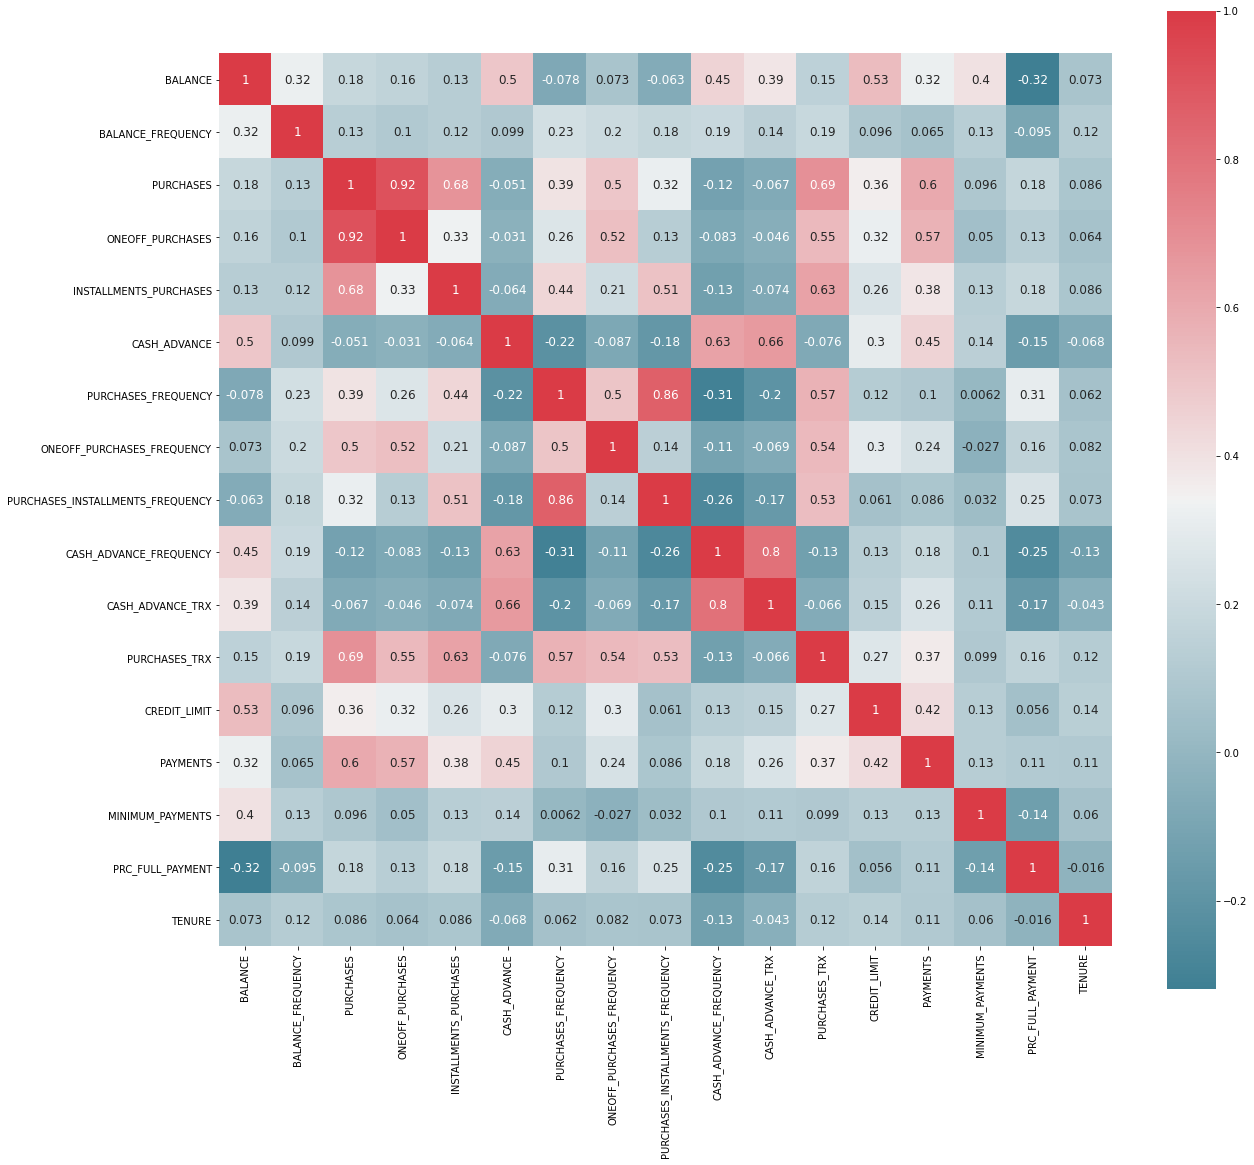

In [14]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

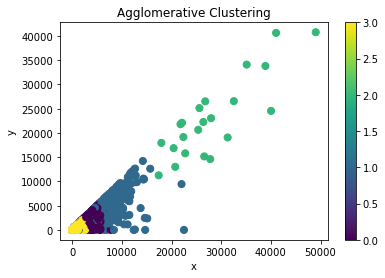

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df["PURCHASES"],df["ONEOFF_PURCHASES"],
                  c =agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

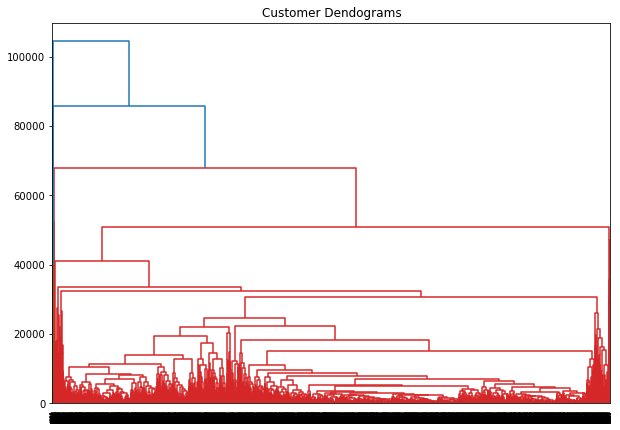

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10 ,7))
plt.title("Customer Dendograms")
dend= shc.dendrogram(shc.linkage(df, method='complete'))

In [17]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

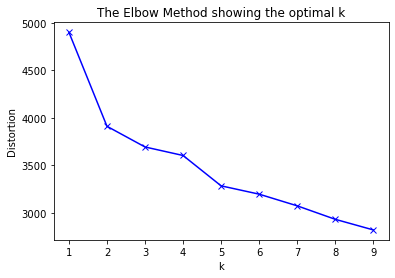

In [18]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


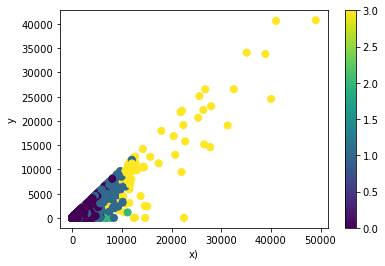

In [20]:
labels=pd.DataFrame(kmeans.labels_)
import matplotlib.pyplot as plt 
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df['PURCHASES'],df['ONEOFF_PURCHASES'],
                  c=labels[0],s=50)
ax.set_title('')
ax.set_xlabel('x)')
ax.set_ylabel('y')
plt.colorbar(scatter)